# BioBot_FDS_05_Prepare_Moving_Windows_Ds
## Deliverable_05: Preparing a balanced dataset using moving windows
Author/code developer: Yan Bello. 18/11/2018. As part of the Master in Artificial Intelligence (UNIR). 
This file/code is part of the development and exploration/experimentation on a Fall Detection System (FDS). 

---


In the following sections, we used this dataset: 
SisFall: A Fall and Movement Dataset. 
Created by: A. Sucerquia, J.D. López, J.F. Vargas-Bonilla
SISTEMIC, Faculty of Engineering, Universidad de Antiquia UDEA.
Detailed information about this dataset can be found in this website: http://sistemic.udea.edu.co/en/investigacion/proyectos/english-falls/.
Reference paper: Sucerquia A, López JD, Vargas-Bonilla JF. SisFall: A Fall and Movement Dataset. Sensors (Basel). 2017;17(1):198. Published 2017 Jan 20. doi:10.3390/s17010198

---



In [1]:
# Preliminary step 0. We need to establish/select our working folders. First, ensure  the previous dataset files are available.
# The code below is prepared to work with two options: local drive or mounting a Google Drive for Colab
# Select the appropriate configuration for your environment by commenting/un-commenting the following lines:

# To work with Google Colab and Google Drive:  
from google.colab import drive 
drive.mount('/content/gdrive')
FILE_DIRECTORY =  "gdrive/My Drive/Colab Notebooks/"
SisFall_ALL_DIRECTORY =  FILE_DIRECTORY + "SisFall_Dataset/"

print(FILE_DIRECTORY)
print(SisFall_ALL_DIRECTORY)

# To work with a local drive, uncomment these line:
# FILE_DIRECTORY =  os.getcwd() + "\\"
# SisFall_ALL_DIRECTORY =  FILE_DIRECTORY + "SisFall_dataset_ALL\\"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
gdrive/My Drive/Colab Notebooks/
gdrive/My Drive/Colab Notebooks/SisFall_Dataset/


In [0]:
drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


In [2]:
from google.colab import files
import zipfile #, io, os

print(SisFall_ALL_DIRECTORY + 'SisFall_dataset.zip')

DATA_DIRECTORY =  SisFall_ALL_DIRECTORY + "data/"
# zfile = zipfile.ZipFile(SisFall_ALL_DIRECTORY + 'SisFall_dataset.zip', 'r') 
# zfile.extractall(DATA_DIRECTORY)
DATA_DIRECTORY =  SisFall_ALL_DIRECTORY + "data/SisFall_dataset/"

gdrive/My Drive/Colab Notebooks/SisFall_Dataset/SisFall_dataset.zip


## 5.1 Read the file names

In [3]:
# Import required libraries
import os
from os import walk
import pandas as pd
import numpy as np
import glob

# The dataset files must be located in the "SisFall_dataset_ALL" folder 

file_names = []
dir_names = []

print(DATA_DIRECTORY+'*/*.txt')
file_path = glob.glob(DATA_DIRECTORY+'*/*.txt')
file_name = [os.path.basename(p) for p in file_path]
print(file_name)

# Create a dataframe and load filenames into the File column
df_Files_Trials = pd.DataFrame({"File": file_name, "Path": file_path})
#print(df_Files_Trials['File'][0])
#print(df_Files_Trials.Path[0])

# Define a function fn to compute the values of the new column Act_Type
fn = lambda row: (row.File[0:3]) 
col = df_Files_Trials.apply(fn, axis=1) # get column data applying fn to the dataset
df_Files_Trials = df_Files_Trials.assign(Act_Type=col.values) # assign values to column 'Act_Type'

# Define a function fn to compute the values of the new column Age_Cat
fn = lambda row: (row.File[4:6]) 
col = df_Files_Trials.apply(fn, axis=1) # get column data applying fn to the dataset
#print(col)
df_Files_Trials = df_Files_Trials.assign(Age_Cat=col.values) # assign values to column 'Age_Cat'
print(df_Files_Trials.loc)

# assign initial values to the following columns
df_Files_Trials = df_Files_Trials.assign(S1_Max_N_XYZ=0)
df_Files_Trials = df_Files_Trials.assign(S1_Max_N_HOR=0)
df_Files_Trials = df_Files_Trials.assign(S3_Max_N_XYZ=0)
df_Files_Trials = df_Files_Trials.assign(S3_Max_N_HOR=0)


# in MS Windows systems,  desktop.ini file is automatically generated. Let's get rid of it...
df_Files_Trials.drop(df_Files_Trials.loc[df_Files_Trials['File']=="desktop.ini"].index, inplace=True)

# lets preview the header and tail of the dataset
print(df_Files_Trials.head())
print(df_Files_Trials.tail())

# Note: this dataset includes 4.500 files. You should get this number of entries in the dataset.


gdrive/My Drive/Colab Notebooks/SisFall_Dataset/data/SisFall_dataset/*/*.txt
['D01_SA01_R01.txt', 'D02_SA01_R01.txt', 'D03_SA01_R01.txt', 'D04_SA01_R01.txt', 'D05_SA01_R01.txt', 'D05_SA01_R02.txt', 'D05_SA01_R03.txt', 'D05_SA01_R04.txt', 'D05_SA01_R05.txt', 'D06_SA01_R01.txt', 'D06_SA01_R02.txt', 'D06_SA01_R03.txt', 'D06_SA01_R04.txt', 'D06_SA01_R05.txt', 'D07_SA01_R01.txt', 'D07_SA01_R02.txt', 'D07_SA01_R03.txt', 'D07_SA01_R04.txt', 'D07_SA01_R05.txt', 'D08_SA01_R01.txt', 'D08_SA01_R02.txt', 'D08_SA01_R03.txt', 'D08_SA01_R04.txt', 'D08_SA01_R05.txt', 'D09_SA01_R01.txt', 'D09_SA01_R02.txt', 'D09_SA01_R03.txt', 'D09_SA01_R04.txt', 'D09_SA01_R05.txt', 'D10_SA01_R01.txt', 'D10_SA01_R02.txt', 'D10_SA01_R03.txt', 'D10_SA01_R04.txt', 'D10_SA01_R05.txt', 'D11_SA01_R01.txt', 'D11_SA01_R02.txt', 'D11_SA01_R03.txt', 'D11_SA01_R04.txt', 'D11_SA01_R05.txt', 'D12_SA01_R01.txt', 'D12_SA01_R02.txt', 'D12_SA01_R03.txt', 'D12_SA01_R04.txt', 'D12_SA01_R05.txt', 'D13_SA01_R01.txt', 'D13_SA01_R02.txt', 'D

## 5.2 Balance the samples in the dataset

In [4]:
print("____________________________")
print("Activities of Daily Living (ADL):")
print(len(df_Files_Trials[df_Files_Trials.Act_Type.str.contains('D')]))
print("____________________________")
print("FALLS:")
print(len(df_Files_Trials[df_Files_Trials.Act_Type.str.contains('F')]))
number_of_FALLs = len(df_Files_Trials[df_Files_Trials.Act_Type.str.contains('F')])
df_Files_Falls = df_Files_Trials[df_Files_Trials.Act_Type.str.contains('F')]
df_Files_ADL = df_Files_Trials[df_Files_Trials.Act_Type.str.contains('D')]
print(len(df_Files_ADL))
df_Files_ADL = df_Files_ADL.sample(n=number_of_FALLs,random_state=1)
print(len(df_Files_ADL))
df_Files_ADL.head()
print("Contents of df_Files_Trials (Before pd.concat():")
print(len(df_Files_Trials))
df_Files_Trials =  pd.concat([df_Files_ADL, df_Files_Falls], axis=0)
print("Contents of df_Files_Trials:")
print(len(df_Files_Trials))
print(df_Files_Trials.head())
df_Files_Trials.tail()

____________________________
Activities of Daily Living (ADL):
2707
____________________________
FALLS:
1798
2707
1798
Contents of df_Files_Trials (Before pd.concat():
4505
Contents of df_Files_Trials:
3596
                  File                                               Path  \
807   D11_SA06_R04.txt  gdrive/My Drive/Colab Notebooks/SisFall_Datase...   
4382  D16_SE13_R05.txt  gdrive/My Drive/Colab Notebooks/SisFall_Datase...   
3655  D07_SE03_R03.txt  gdrive/My Drive/Colab Notebooks/SisFall_Datase...   
1547  D05_SA11_R04.txt  gdrive/My Drive/Colab Notebooks/SisFall_Datase...   
4296  D10_SE12_R03.txt  gdrive/My Drive/Colab Notebooks/SisFall_Datase...   

     Act_Type Age_Cat  S1_Max_N_XYZ  S1_Max_N_HOR  S3_Max_N_XYZ  S3_Max_N_HOR  
807       D11      SA             0             0             0             0  
4382      D16      SE             0             0             0             0  
3655      D07      SE             0             0             0             0  
1547      

,File,Path,Act_Type,Age_Cat,S1_Max_N_XYZ,S1_Max_N_HOR,S3_Max_N_XYZ,S3_Max_N_HOR
3970,F15_SE06_R01.txt,gdrive/My Drive/Colab Notebooks/SisFall_Datase...,F15,SE,0,0,0,0
3971,F15_SE06_R02.txt,gdrive/My Drive/Colab Notebooks/SisFall_Datase...,F15,SE,0,0,0,0
3972,F15_SE06_R03.txt,gdrive/My Drive/Colab Notebooks/SisFall_Datase...,F15,SE,0,0,0,0
3973,F15_SE06_R04.txt,gdrive/My Drive/Colab Notebooks/SisFall_Datase...,F15,SE,0,0,0,0
3974,F15_SE06_R05.txt,gdrive/My Drive/Colab Notebooks/SisFall_Datase...,F15,SE,0,0,0,0


In [0]:
import matplotlib.pyplot as mplt
import numpy as np
import math



def do_array(ar):
  return np.sqrt(ar[0]**2 + ar[1]**2 + ar[2]**2)

def process_input_files(trial_file_path, Act_Type, Act_Cat, FileName):
    df_Mediciones_WIP = pd.DataFrame(pd.read_csv(trial_file_path, header = None, sep = ',', 
                                         names = ["S1_X", "S1_Y", "S1_Z", 
                                                  "S2_X", "S2_Y", "S2_Z", 
                                                  "S3_X", "S3_Y", "S3_Z"], 
                                                   skiprows= 0))

    df_Mediciones_WIP.S3_Z = df_Mediciones_WIP.S3_Z.apply(lambda x: x[:-1]).astype(int)


    # Let's calculate the values for SENSOR_1
    Sensor1_Resolution = 13
    Sensor1_Range = 16
    g_S1 = (2*Sensor1_Range/2**Sensor1_Resolution)
   
    # Let's calculate the values for SENSOR_2
    # Angular velocity [°/s]: [(2*Range)/(2^Resolution)]*RD
    Sensor2_Resolution = 16
    Sensor2_Range = 2000
    av_S2 = (2*Sensor2_Range/2**Sensor2_Resolution)  

    # Let's calculate the values for SENSOR_3
    Sensor3_Resolution = 14
    Sensor3_Range = 8
    g_S3 = (2*Sensor3_Range/2**Sensor3_Resolution)      
  
    npData = df_Mediciones_WIP.values.astype(np.float32)
    npData[:,0:3] = npData[:,0:3]*g_S1
    npData[:,3:6] = npData[:,3:6]*av_S2
    npData[:,6:] = npData[:,6:]*g_S3  
    
    vect = np.array([do_array(x) for x in npData[:,0:3]])
    vect = np.reshape(vect, (len(vect), 1))
    max_N = np.max(vect)
    max_N_index = np.argmax(vect)
    min_N = np.min(vect)
    min_N_index = np.argmin(vect)
    len_data = len(vect)
    
    win_size = 200 #200 sample = 1s
    
    # We work with a sliding-window of 1sec (200 measurements), starting 2sec (200 measurements) before the peak/MAX
    if (max_N_index - 2*win_size<0):
        index_min_window = 0
        index_max_window = (win_size*3)
        print("VENTANA BAJA index:" + str(index_min_window))
    else:
        if (max_N_index + win_size+1 > len_data):
            index_min_window = len_data - (win_size*3)
            index_max_window = len_data
            print("VENTANA ALTA index:" + str(index_min_window))
        else:
            # extract the central window
            index_min_window = max_N_index - win_size*2
            index_max_window = max_N_index + win_size
            print("VENTANA NORMAL index:" + str(index_min_window))

#     print("max_N = " + str(max_N))
#     print("max_N_index = " + str(max_N_index))
#     print("min_N = " + str(min_N))
#     print("min_N_index = " + str(min_N_index))  
    
#     print(npData[index_min_window:index_max_window,:].shape)
#     print(vect[index_min_window:index_max_window].shape)
    
    tmpData3 = np.hstack((npData[index_min_window:index_max_window,:], vect[index_min_window:index_max_window]))
#     print("shape = " + str(tmpData3.shape))
    
    tmpData2 = np.array([tmpData3, trial_file_path, Act_Type, Act_Cat, FileName])
    tmpData = tmpData2[0]
#     print(tmpData2[1])
#     print(tmpData2[2])
#     print(tmpData2[3])
#     print(tmpData2[4])

    global allData
#     print(allData.shape)
#     print(tmpData2.shape)
    allData = np.vstack((allData, tmpData2))
    #print(allData.shape)
    #allData = allData2
        
#     mplt.plot(tmpData[:,0:3])
#     mplt.figure()
#     mplt.plot(tmpData[:, 9])
#     mplt.figure()
#     mplt.plot(tmpData[:,3:6])
#     mplt.figure()
#     mplt.plot(tmpData[:,6:9])
    



    
    
import time
from datetime import timedelta

start_time = time.time()
    
allData = np.array([0,0,0,0,0], dtype=object)
total_num_iter = len(df_Files_Trials.Path)
iter_no = 1
iter_start_time = time.time()

for index, row in df_Files_Trials.iterrows():
  
#   if (iter_no > 5):
#     break
      
  iter_no += 1
  print("iter_no: ", iter_no)
  print("index: ", index)
  
  process_input_files(row.Path, row.Act_Type, row.Age_Cat, row.File)
  print(allData.shape)
  
  elapsed_time_secs = time.time() - iter_start_time
  msg = "Iteration took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))
  print(msg)
  remaining_time = round(((time.time() - start_time)/iter_no)*(total_num_iter-iter_no))
  msg = "REMAINING TIME: %s secs (Wall clock time)" % timedelta(seconds = remaining_time)
  print(msg)

  print("________________________________________________________________________________________")    
    
  
  
  
elapsed_time_secs = time.time() - start_time

msg = "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))

OUTPUT_DIRECTORY =  SisFall_ALL_DIRECTORY + "data/"
fname = OUTPUT_DIRECTORY + 'Unified_ADL_Falls_BALANCED.npy'
print(fname)
np.save(fname, allData)

allfile2 = np.load(fname)
print(allfile2)



  
# l1 = df_Files_Trials.index[df_Files_Trials.File == "F01_SA01_R01.txt"].tolist()
# print(l1)
# print(df_Files_Trials.File.loc[l1[0]])

# file_list = df_Files_Trials.Path.loc[l1[0]]
# print(file_list)


# plot_trial_file(file_list, df_Files_Trials.Act_Type.loc[l1[0]], df_Files_Trials.Age_Cat.loc[l1[0]], df_Files_Trials.File.loc[l1[0]])
# print(allData.shape)









[902]
F11_SA06_R04.txt
gdrive/My Drive/Colab Notebooks/SisFall_Dataset/data/SisFall_dataset/SA06/F11_SA06_R04.txt
VENTANA NORMAL index:264
max_N = 5.381338241509378
max_N_index = 664
min_N = 0.18363530114911186
min_N_index = 690
(3596, 5)
[807]
D11_SA06_R04.txt
gdrive/My Drive/Colab Notebooks/SisFall_Dataset/data/SisFall_dataset/SA06/D11_SA06_R04.txt
VENTANA NORMAL index:1019
max_N = 4.242590335385477
max_N_index = 1419
min_N = 0.21119053110801986
min_N_index = 1436
(3596, 5)


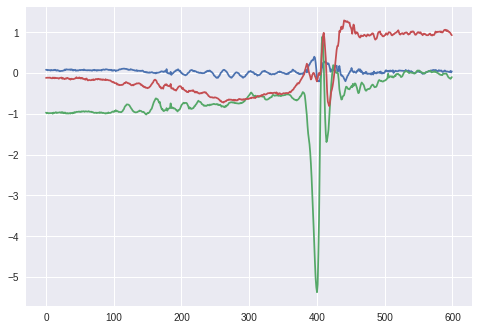

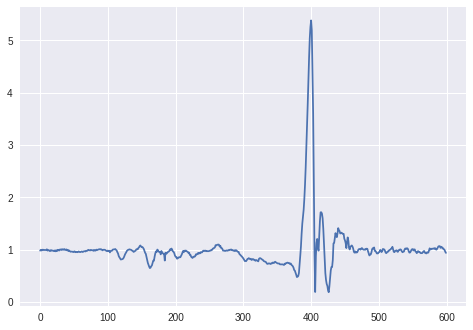

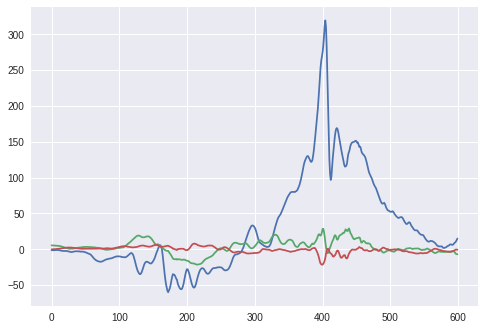

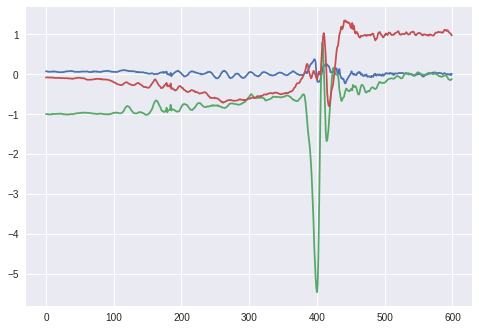

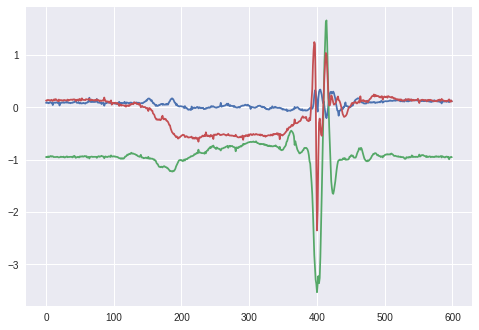

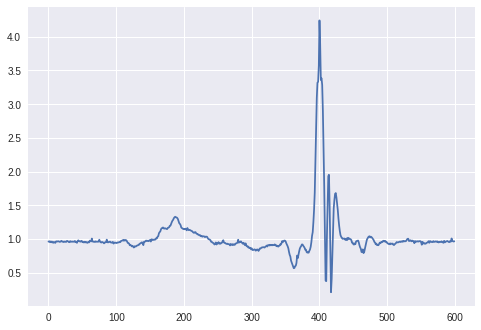

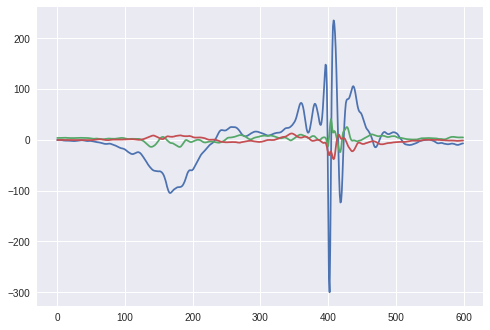

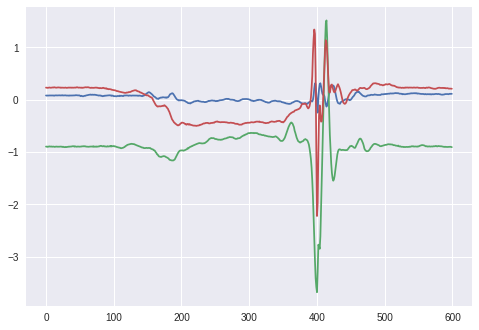

<Figure size 576x396 with 0 Axes>

In [95]:
import matplotlib.pyplot as mplt
import numpy as np
import math



def do_array(ar):
  return np.sqrt(ar[0]**2 + ar[1]**2 + ar[2]**2)

def plot_trial_file(trial_file_path, Act_Type, Act_Cat, FileName):
    df_Mediciones_WIP = pd.DataFrame(pd.read_csv(trial_file_path, header = None, sep = ',', 
                                         names = ["S1_X", "S1_Y", "S1_Z", 
                                                  "S2_X", "S2_Y", "S2_Z", 
                                                  "S3_X", "S3_Y", "S3_Z"], 
                                                   skiprows= 0))

    df_Mediciones_WIP.S3_Z = df_Mediciones_WIP.S3_Z.apply(lambda x: x[:-1]).astype(int)


    # Let's calculate the values for SENSOR_1
    Sensor1_Resolution = 13
    Sensor1_Range = 16
    g_S1 = (2*Sensor1_Range/2**Sensor1_Resolution)
   
    # Let's calculate the values for SENSOR_2
    # Angular velocity [°/s]: [(2*Range)/(2^Resolution)]*RD
    Sensor2_Resolution = 16
    Sensor2_Range = 2000
    av_S2 = (2*Sensor2_Range/2**Sensor2_Resolution)  

    # Let's calculate the values for SENSOR_3
    Sensor3_Resolution = 14
    Sensor3_Range = 8
    g_S3 = (2*Sensor3_Range/2**Sensor3_Resolution)      
  
    npData = df_Mediciones_WIP.values.astype(np.float32)
    npData[:,0:3] = npData[:,0:3]*g_S1
    npData[:,3:6] = npData[:,3:6]*av_S2
    npData[:,6:] = npData[:,6:]*g_S3  
    
    vect = np.array([do_array(x) for x in npData[:,0:3]])
    vect = np.reshape(vect, (len(vect), 1))
    max_N = np.max(vect)
    max_N_index = np.argmax(vect)
    min_N = np.min(vect)
    min_N_index = np.argmin(vect)
    len_data = len(vect)
    
    win_size = 200 #200 sample = 1s
    
    # We work with a sliding-window of 1sec (200 measurements), starting 2sec (200 measurements) before the peak/MAX
    if (max_N_index - 2*win_size<0):
        index_min_window = 0
        index_max_window = (win_size*3)
        print("VENTANA BAJA index:" + str(index_min_window))
    else:
        if (max_N_index + win_size+1 > len_data):
            index_min_window = len_data - (win_size*3)
            index_max_window = len_data
            print("VENTANA ALTA index:" + str(index_min_window))
        else:
            # extract the central window
            index_min_window = max_N_index - win_size*2
            index_max_window = max_N_index + win_size
            print("VENTANA NORMAL index:" + str(index_min_window))

    print("max_N = " + str(max_N))
    print("max_N_index = " + str(max_N_index))
    print("min_N = " + str(min_N))
    print("min_N_index = " + str(min_N_index))  
    
#     print(npData[index_min_window:index_max_window,:].shape)
#     print(vect[index_min_window:index_max_window].shape)
    
    tmpData3 = np.hstack((npData[index_min_window:index_max_window,:], vect[index_min_window:index_max_window]))
#     print("shape = " + str(tmpData3.shape))
    
    tmpData2 = np.array([tmpData3, trial_file_path, Act_Type, Act_Cat, FileName])
    tmpData = tmpData2[0]
#     print(tmpData2[1])
#     print(tmpData2[2])
#     print(tmpData2[3])
#     print(tmpData2[4])

#     global allData
# #     print(allData.shape)
# #     print(tmpData2.shape)
#     allData = np.vstack((allData, tmpData2))
#     #print(allData.shape)
#     #allData = allData2
        
    mplt.plot(tmpData[:,0:3])
    mplt.figure()
    mplt.plot(tmpData[:, 9])
    mplt.figure()
    mplt.plot(tmpData[:,3:6])
    mplt.figure()
    mplt.plot(tmpData[:,6:9])
    mplt.figure()
    



    


  
l1 = df_Files_Trials.index[df_Files_Trials.File == "F11_SA06_R04.txt"].tolist()
print(l1)
print(df_Files_Trials.File.loc[l1[0]])

file_list = df_Files_Trials.Path.loc[l1[0]]
print(file_list)


plot_trial_file(file_list, df_Files_Trials.Act_Type.loc[l1[0]], df_Files_Trials.Age_Cat.loc[l1[0]], df_Files_Trials.File.loc[l1[0]])
print(allData.shape)

l1 = df_Files_Trials.index[df_Files_Trials.File == "D11_SA06_R04.txt"].tolist()
print(l1)
print(df_Files_Trials.File.loc[l1[0]])

file_list = df_Files_Trials.Path.loc[l1[0]]
print(file_list)


plot_trial_file(file_list, df_Files_Trials.Act_Type.loc[l1[0]], df_Files_Trials.Age_Cat.loc[l1[0]], df_Files_Trials.File.loc[l1[0]])
print(allData.shape)

In [101]:
import matplotlib.pyplot as mplt
import numpy as np
import math



def do_array(ar):
  return np.sqrt(ar[0]**2 + ar[1]**2 + ar[2]**2)

def label_dataset(row):

    data = row[0]
    path = row[1]
    Act_Type = row[2]
    Act_Cat = row[3]
    FileName = row[4]

    print(data.shape)
    print(path)
    accl1 = data[:, 0:3]
    magn = data[:, 3:6]
    accl2 = data[:, 6:9]
    vec1 = data[:, 9]
    

    max_N = np.max(vec1)
    max_N_index = np.argmax(vec1)
    min_N = np.min(vec1)
    min_N_index = np.argmin(vec1)
    len_data = len(vec1)
    
    print("max_N = " + str(max_N))
    print("max_N_index = " + str(max_N_index))
    print("min_N = " + str(min_N))
    print("min_N_index = " + str(min_N_index))     
    
    win_size = 150 #200 sample = 1s
    win_step = 5
    
    
    startIndex = max_N_index-win_size
    if startIndex < 0 :
      startIndex = 0
    endIndex = max_N_index+win_step
    if endIndex > len_data :
      endIndex = len_data
      
    print(startIndex)
    print(endIndex)
    
    mplt.plot(accl1[:])
    mplt.figure()
    mplt.plot(accl1[startIndex:endIndex])
    mplt.figure()    
    mplt.plot(accl1[startIndex:endIndex-10])    
    mplt.figure()    



    
    
import time
from datetime import timedelta



OUTPUT_DIRECTORY =  SisFall_ALL_DIRECTORY + "data/"
fname = OUTPUT_DIRECTORY + 'Unified_ADL_Falls_BALANCED.npy'
print(fname)
allData = np.load(fname)
allData = np.delete(allData, (0), axis=0)
print(allData.shape)

# print(allData[0,:].shape)

make_dataset(allData[0,0], allData[0,1], allData[0,2], allData[0,3], allData[0,4])
make_dataset(allData[2010,0], allData[2010,1], allData[2010,2], allData[2010,3], allData[2010,4])
make_dataset(allData[2000,0], allData[2000,1], allData[2000,2], allData[2000,3], allData[2000,4])


(5,)


In [75]:
a = np.random.rand(3,3)
c = np.zeros((3,1))
print(c.shape)
b=np.hstack((a, c))
b
OUTPUT_DIRECTORY =  SisFall_ALL_DIRECTORY + "data/"
fname = OUTPUT_DIRECTORY + 'Unified_ADL_Falls_BALANCED.npy'
print(fname)

outfile = open(fname, 'wb')

print(outfile)
np.save(fname, b)
outfile.close()

(3, 1)
gdrive/My Drive/Colab Notebooks/SisFall_Dataset/data/Unified_ADL_Falls_BALANCED.npy
<_io.BufferedWriter name='gdrive/My Drive/Colab Notebooks/SisFall_Dataset/data/Unified_ADL_Falls_BALANCED.npy'>


## 5.3 Compute the moving windows and save them in a file...

In [0]:
"""In this cell, we process the files to create the moving windows."""

def compute_trial_file(trial_file_name):
 
    df_Mediciones_WIP = pd.DataFrame(pd.read_csv(trial_file_name, header = None, sep = ',', 
                                         names = ["S1_X", "S1_Y", "S1_Z", 
                                                  "S2_X", "S2_Y", "S2_Z", 
                                                  "S3_X", "S3_Y", "S3_Z"], 
                                                   skiprows= 0))

    """Data are in bits with the following characteristics:
    In order to convert the acceleration data (AD) given in bits into gravity, use this equation: 
    Acceleration [g]: [(2*Range)/(2^Resolution)]*AD
    In order to convert the rotation data (RD) given in bits into angular velocity, use this equation:
    Angular velocity [°/s]: [(2*Range)/(2^Resolution)]*RD
    """

    # Let's calculate the values for SENSOR_1
    import math
    Sensor1_Resolution = 13
    Sensor1_Range = 16
    g_S1 = (2*Sensor1_Range/2**Sensor1_Resolution)

    fn = lambda row: math.sqrt((g_S1*row.S1_X)**2 + (g_S1*row.S1_Y)**2 + (g_S1*row.S1_Z)**2) 
    col = df_Mediciones_WIP.apply(fn, axis=1) 
    df_Mediciones_WIP = df_Mediciones_WIP.assign(S1_N_XYZ=col.values)     

    # Get the max value of N_XYZ
    S1_max_N_XYZ = np.max(df_Mediciones_WIP.S1_N_XYZ)
    print("S1_max_N_XYZ = " + str(S1_max_N_XYZ))

    max_N = np.max(df_Mediciones_WIP.S1_N_XYZ)
    max_N_index = df_Mediciones_WIP.index[df_Mediciones_WIP.S1_N_XYZ == max_N][0]
    min_N = np.min(df_Mediciones_WIP.S1_N_XYZ)
    min_N_index = df_Mediciones_WIP.index[df_Mediciones_WIP.S1_N_XYZ == min_N][0]
    len_df_Mediciones = len(df_Mediciones_WIP)
    
    # We work with a sliding-window of 1sec (200 measurements), starting 2sec (200 measurements) before the peak/MAX
    if (max_N_index - 400<0):
        index_min_window = 0
        print("VENTANA BAJA index:" + str(index_min_window))
    else:
        if (max_N_index + 200+1> len_df_Mediciones):
            index_min_window = len_df_Mediciones - 602
            print("VENTANA ALTA index:" + str(index_min_window))
        else:
            # extract the central window
            index_min_window = max_N_index - 400
            print("VENTANA NORMAL index:" + str(index_min_window))

    print("max_N = " + str(max_N))
    print("max_N_index = " + str(max_N_index))
    print("min_N = " + str(min_N))
    print("min_N_index = " + str(min_N_index))    
            
    # ITERATE THROUGHT THE WINDOWS
    for slide_win_index in range(41):
        
        df_Mediciones = df_Mediciones_WIP[index_min_window + 10*slide_win_index: index_min_window + 10*slide_win_index + 200]        
        print("====================================")
        print("WINDOW NR:= " + str(slide_win_index))
        print("Start:= " + str(index_min_window + 10*slide_win_index))
        print("Fin:= " + str(index_min_window + 10*slide_win_index + 200))
        print("====================================")

        # S1_N_HOR
        fn_hor = lambda row: math.sqrt((g_S1*row.S1_Y)**2 + (g_S1*row.S1_Z)**2) 
        col = df_Mediciones.apply(fn_hor, axis=1) 
        df_Mediciones = df_Mediciones.assign(S1_N_HOR=col.values) 

        # S1_N_VER
        fn_ver = lambda row: math.sqrt((g_S1*row.S1_X)**2 + (g_S1*row.S1_Z)**2) 
        col = df_Mediciones.apply(fn_ver, axis=1) 
        df_Mediciones = df_Mediciones.assign(S1_N_VER=col.values) 

        field_name = "S1_X"

        var_X = df_Mediciones[field_name].var()
        mean_X = df_Mediciones[field_name].mean()
        std_X = df_Mediciones[field_name].std()
        median_X = df_Mediciones[field_name].median()
        max_X = df_Mediciones[field_name].max()
        min_X = df_Mediciones[field_name].min()
        range_X = max_X - min_X
        kurtosis_X = df_Mediciones[field_name].kurtosis()
        skewness_X =  df_Mediciones[field_name].skew()

        df_Features = pd.DataFrame({"var_" + field_name: [var_X], 
                                    "mean_" + field_name:[mean_X],
                                    "std_" + field_name:[std_X], 
                                    "max_" + field_name:[max_X],
                                    "min_" + field_name:[min_X], 
                                    "range_" + field_name:[range_X],
                                    "kurtosis_" + field_name:[kurtosis_X],
                                    "skewness_" + field_name:[skewness_X]})                              

        field_name = "S1_Y"

        var_X = df_Mediciones[field_name].var()
        mean_X = df_Mediciones[field_name].mean()
        std_X = df_Mediciones[field_name].std()
        median_X = df_Mediciones[field_name].median()
        max_X = df_Mediciones[field_name].max()
        min_X = df_Mediciones[field_name].min()
        range_X = max_X - min_X
        kurtosis_X = df_Mediciones[field_name].kurtosis()
        skewness_X =  df_Mediciones[field_name].skew()

        df_Features_2 = pd.DataFrame({"var_" + field_name: [var_X], 
                                    "mean_" + field_name:[mean_X],
                                    "std_" + field_name:[std_X], 
                                    "max_" + field_name:[max_X],
                                    "min_" + field_name:[min_X], 
                                    "range_" + field_name:[range_X],
                                    "kurtosis_" + field_name:[kurtosis_X],
                                    "skewness_" + field_name:[skewness_X]})                              

        df_Features =  pd.concat([df_Features, df_Features_2], axis=1)

        field_name = "S1_Z"

        var_X = df_Mediciones[field_name].var()
        mean_X = df_Mediciones[field_name].mean()
        std_X = df_Mediciones[field_name].std()
        median_X = df_Mediciones[field_name].median()
        max_X = df_Mediciones[field_name].max()
        min_X = df_Mediciones[field_name].min()
        range_X = max_X - min_X
        kurtosis_X = df_Mediciones[field_name].kurtosis()
        skewness_X =  df_Mediciones[field_name].skew()    

        df_Features_2 = pd.DataFrame({"var_" + field_name: [var_X], 
                                    "mean_" + field_name:[mean_X],
                                    "std_" + field_name:[std_X], 
                                    "max_" + field_name:[max_X],
                                    "min_" + field_name:[min_X], 
                                    "range_" + field_name:[range_X],
                                    "kurtosis_" + field_name:[kurtosis_X],
                                    "skewness_" + field_name:[skewness_X]})                              

        df_Features =  pd.concat([df_Features, df_Features_2], axis=1)

        # acceleration features
        field_name = "S1_N_XYZ"

        var_X = df_Mediciones[field_name].var()
        mean_X = df_Mediciones[field_name].mean()
        std_X = df_Mediciones[field_name].std()
        median_X = df_Mediciones[field_name].median()
        max_X = df_Mediciones[field_name].max()
        min_X = df_Mediciones[field_name].min()
        range_X = max_X - min_X
        kurtosis_X = df_Mediciones[field_name].kurtosis()
        skewness_X =  df_Mediciones[field_name].skew()    

        df_Features_2 = pd.DataFrame({"var_" + field_name: [var_X], 
                                    "mean_" + field_name:[mean_X],
                                    "std_" + field_name:[std_X], 
                                    "max_" + field_name:[max_X],
                                    "min_" + field_name:[min_X], 
                                    "range_" + field_name:[range_X],
                                    "kurtosis_" + field_name:[kurtosis_X],
                                    "skewness_" + field_name:[skewness_X]})                              

        df_Features =  pd.concat([df_Features, df_Features_2], axis=1)

        field_name = "S1_N_HOR"

        var_X = df_Mediciones[field_name].var()
        mean_X = df_Mediciones[field_name].mean()
        std_X = df_Mediciones[field_name].std()
        median_X = df_Mediciones[field_name].median()
        max_X = df_Mediciones[field_name].max()
        min_X = df_Mediciones[field_name].min()
        range_X = max_X - min_X
        kurtosis_X = df_Mediciones[field_name].kurtosis()
        skewness_X =  df_Mediciones[field_name].skew()    

        df_Features_2 = pd.DataFrame({"var_" + field_name: [var_X], 
                                    "mean_" + field_name:[mean_X],
                                    "std_" + field_name:[std_X], 
                                    "max_" + field_name:[max_X],
                                    "min_" + field_name:[min_X], 
                                    "range_" + field_name:[range_X],
                                    "kurtosis_" + field_name:[kurtosis_X],
                                    "skewness_" + field_name:[skewness_X]})                              

        df_Features =  pd.concat([df_Features, df_Features_2], axis=1)

        field_name = "S1_N_VER"

        var_X = df_Mediciones[field_name].var()
        mean_X = df_Mediciones[field_name].mean()
        std_X = df_Mediciones[field_name].std()
        median_X = df_Mediciones[field_name].median()
        max_X = df_Mediciones[field_name].max()
        min_X = df_Mediciones[field_name].min()
        range_X = max_X - min_X
        kurtosis_X = df_Mediciones[field_name].kurtosis()
        skewness_X =  df_Mediciones[field_name].skew()    

        df_Features_2 = pd.DataFrame({"var_" + field_name: [var_X], 
                                    "mean_" + field_name:[mean_X],
                                    "std_" + field_name:[std_X], 
                                    "max_" + field_name:[max_X],
                                    "min_" + field_name:[min_X], 
                                    "range_" + field_name:[range_X],
                                    "kurtosis_" + field_name:[kurtosis_X],
                                    "skewness_" + field_name:[skewness_X]})                              

        df_Features =  pd.concat([df_Features, df_Features_2], axis=1)

        corr_valueXY = df_Mediciones["S1_X"].corr(df_Mediciones["S1_Y"])
        corr_valueXZ = df_Mediciones["S1_X"].corr(df_Mediciones["S1_Z"])
        corr_valueYZ = df_Mediciones["S1_Y"].corr(df_Mediciones["S1_Z"])
        corr_valueNV = df_Mediciones["S1_N_XYZ"].corr(df_Mediciones["S1_N_VER"])
        corr_valueNH = df_Mediciones["S1_N_XYZ"].corr(df_Mediciones["S1_N_HOR"])
        corr_valueHV = df_Mediciones["S1_N_HOR"].corr(df_Mediciones["S1_N_VER"])

        df_Features_2 = pd.DataFrame({"corr_XY": [corr_valueXY], 
                                    "corr_XZ": [corr_valueXZ],
                                    "corr_YZ": [corr_valueYZ],
                                    "corr_NV": [corr_valueNV],
                                    "corr_NH": [corr_valueNH], 
                                    "corr_HV": [corr_valueHV]})       

        df_Features =  pd.concat([df_Features, df_Features_2], axis=1)

        trial_file_name = row['File']

        df_Features_2 = pd.DataFrame({"Age_Cat": [trial_file_name[4:6]],
                                      "Fall_ADL": [trial_file_name[0:1]],
                                      "Act_Type": [trial_file_name[0:3]],
                                      "0_Win_ID": slide_win_index,
                                      "File": [trial_file_name],})  

        df_Features =  pd.concat([df_Features_2, df_Features], axis=1)

        # These lines are for creating the file structure:
        # df_field_list = pd.DataFrame(list(df_Features.columns)).T
        # print(df_field_list)
        # df_field_list.to_csv(FILE_DIRECTORY + 'Unified_ADL_Falls.txt', mode='w', header=False)    

        # writes the record/instance data:
        outfile = open(FILE_DIRECTORY + 'Unified_ADL_Falls_BALANCED.txt', 'a')
        df_Features.to_csv(outfile, header=True)
        outfile.close()

        del df_Features
        del df_Features_2
    
    return max_N, max_N_index, min_N, min_N_index


"""
______________________________________________________________ 
"""

import time
from datetime import timedelta

start_time = time.time()

#
# Perform lots of computations.
#

# to get a specific type of activity use this line with the corresponding activity code
# file_list = df_Files_Trials[df_Files_Trials.Act_Type == "D01"][["File"]]
file_list = df_Files_Trials[["File"]]
total_num_iter = len(file_list)
iter_no = 1
    
for index, row in file_list.iterrows():
    iter_start_time = time.time()
    
    my_data_file_name = SisFall_ALL_DIRECTORY + row['File']
    print("_________ ITERATION NO: " + str(iter_no) + "/" + str(total_num_iter) + " (TOTAL)___________________________")
    iter_no +=1
    # USE THIS CONDITION (IF) to control processing scope. 
    if iter_no >2: 
        print("_________ SKIPPING TRIAL FILE: " + row['File'] + " ___________________________")
        continue
        
    print("_________ PROCESSING TRIAL FILE: " + row['File'] + " ___________________________")
    max_N, max_N_index, min_N, min_N_index = compute_trial_file(my_data_file_name)
    print("________________________________________________________________________________________")    
    elapsed_time_secs = time.time() - iter_start_time
    msg = "Iteration took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))
    print(msg)
    remaining_time = round(((time.time() - start_time)/iter_no)*(total_num_iter-iter_no))
    msg = "REMAINING TIME: %s secs (Wall clock time)" % timedelta(seconds = remaining_time)
    print(msg)

    print("________________________________________________________________________________________")    
    

elapsed_time_secs = time.time() - start_time

msg = "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))

print(msg)


_________ ITERATION NO: 1/3596 (TOTAL)___________________________
_________ PROCESSING TRIAL FILE: D08_SA06_R02.txt ___________________________
S1_max_N_XYZ = 3.9351857968664423
VENTANA NORMAL index:146
max_N = 3.9351857968664423
max_N_index = 546
min_N = 0.059112288868834205
min_N_index = 1342
WINDOW NR:= 0
Start:= 146
Fin:= 346
________________________________________________________________________________________
Iteration took: 0:00:00 secs (Wall clock time)
REMAINING TIME: 0:08:43 secs (Wall clock time)
________________________________________________________________________________________
_________ ITERATION NO: 2/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D13_SA23_R04.txt ___________________________
_________ ITERATION NO: 3/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D14_SE08_R05.txt ___________________________
_________ ITERATION NO: 4/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D11_SA13_R01.tx

_________ ITERATION NO: 563/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D03_SA07_R01.txt ___________________________
_________ ITERATION NO: 564/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D07_SE08_R05.txt ___________________________
_________ ITERATION NO: 565/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D05_SA22_R02.txt ___________________________
_________ ITERATION NO: 566/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D05_SA16_R05.txt ___________________________
_________ ITERATION NO: 567/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D08_SA09_R01.txt ___________________________
_________ ITERATION NO: 568/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D02_SA02_R01.txt ___________________________
_________ ITERATION NO: 569/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D09_SA13_R02.txt ____________________

_________ ITERATION NO: 818/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D18_SA02_R05.txt ___________________________
_________ ITERATION NO: 819/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D10_SE03_R05.txt ___________________________
_________ ITERATION NO: 820/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D06_SA14_R03.txt ___________________________
_________ ITERATION NO: 821/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D12_SA21_R05.txt ___________________________
_________ ITERATION NO: 822/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D11_SE06_R05.txt ___________________________
_________ ITERATION NO: 823/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D11_SE14_R01.txt ___________________________
_________ ITERATION NO: 824/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D13_SA11_R05.txt ____________________

_________ ITERATION NO: 1127/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D04_SE14_R01.txt ___________________________
_________ ITERATION NO: 1128/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D17_SE01_R03.txt ___________________________
_________ ITERATION NO: 1129/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D16_SA23_R03.txt ___________________________
_________ ITERATION NO: 1130/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D14_SA14_R01.txt ___________________________
_________ ITERATION NO: 1131/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D16_SA12_R05.txt ___________________________
_________ ITERATION NO: 1132/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D17_SE03_R01.txt ___________________________
_________ ITERATION NO: 1133/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D09_SE08_R01.txt _____________

_________ ITERATION NO: 1456/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D07_SA12_R04.txt ___________________________
_________ ITERATION NO: 1457/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D06_SA22_R04.txt ___________________________
_________ ITERATION NO: 1458/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D14_SE07_R05.txt ___________________________
_________ ITERATION NO: 1459/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D08_SA19_R05.txt ___________________________
_________ ITERATION NO: 1460/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D08_SA18_R04.txt ___________________________
_________ ITERATION NO: 1461/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D08_SA21_R02.txt ___________________________
_________ ITERATION NO: 1462/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D08_SE02_R04.txt _____________

_________ SKIPPING TRIAL FILE: D15_SA22_R04.txt ___________________________
_________ ITERATION NO: 1782/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D08_SE08_R04.txt ___________________________
_________ ITERATION NO: 1783/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D17_SE04_R03.txt ___________________________
_________ ITERATION NO: 1784/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D18_SA10_R03.txt ___________________________
_________ ITERATION NO: 1785/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D11_SA23_R05.txt ___________________________
_________ ITERATION NO: 1786/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D17_SE15_R02.txt ___________________________
_________ ITERATION NO: 1787/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: D09_SE13_R03.txt ___________________________
_________ ITERATION NO: 1788/3596 (TOTAL)_____________

_________ ITERATION NO: 1960/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F02_SA09_R03.txt ___________________________
_________ ITERATION NO: 1961/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F02_SA09_R04.txt ___________________________
_________ ITERATION NO: 1962/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F02_SA09_R05.txt ___________________________
_________ ITERATION NO: 1963/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F02_SA10_R01.txt ___________________________
_________ ITERATION NO: 1964/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F02_SA10_R02.txt ___________________________
_________ ITERATION NO: 1965/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F02_SA10_R03.txt ___________________________
_________ ITERATION NO: 1966/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F02_SA10_R04.txt _____________

_________ SKIPPING TRIAL FILE: F03_SA06_R04.txt ___________________________
_________ ITERATION NO: 2067/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F03_SA06_R05.txt ___________________________
_________ ITERATION NO: 2068/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F03_SA07_R01.txt ___________________________
_________ ITERATION NO: 2069/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F03_SA07_R02.txt ___________________________
_________ ITERATION NO: 2070/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F03_SA07_R03.txt ___________________________
_________ ITERATION NO: 2071/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F03_SA07_R04.txt ___________________________
_________ ITERATION NO: 2072/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F03_SA07_R05.txt ___________________________
_________ ITERATION NO: 2073/3596 (TOTAL)_____________

_________ ITERATION NO: 2416/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F06_SA04_R04.txt ___________________________
_________ ITERATION NO: 2417/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F06_SA04_R05.txt ___________________________
_________ ITERATION NO: 2418/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F06_SA05_R01.txt ___________________________
_________ ITERATION NO: 2419/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F06_SA05_R02.txt ___________________________
_________ ITERATION NO: 2420/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F06_SA05_R03.txt ___________________________
_________ ITERATION NO: 2421/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F06_SA05_R04.txt ___________________________
_________ ITERATION NO: 2422/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F06_SA05_R05.txt _____________

_________ ITERATION NO: 2816/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F09_SA12_R04.txt ___________________________
_________ ITERATION NO: 2817/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F09_SA12_R05.txt ___________________________
_________ ITERATION NO: 2818/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F09_SA13_R01.txt ___________________________
_________ ITERATION NO: 2819/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F09_SA13_R02.txt ___________________________
_________ ITERATION NO: 2820/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F09_SA13_R03.txt ___________________________
_________ ITERATION NO: 2821/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F09_SA13_R04.txt ___________________________
_________ ITERATION NO: 2822/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F09_SA13_R05.txt _____________

_________ SKIPPING TRIAL FILE: F13_SA07_R04.txt ___________________________
_________ ITERATION NO: 3271/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F13_SA07_R05.txt ___________________________
_________ ITERATION NO: 3272/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F13_SA08_R01.txt ___________________________
_________ ITERATION NO: 3273/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F13_SA08_R02.txt ___________________________
_________ ITERATION NO: 3274/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F13_SA08_R03.txt ___________________________
_________ ITERATION NO: 3275/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F13_SA08_R04.txt ___________________________
_________ ITERATION NO: 3276/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F13_SA08_R05.txt ___________________________
_________ ITERATION NO: 3277/3596 (TOTAL)_____________

_________ SKIPPING TRIAL FILE: F15_SA18_R04.txt ___________________________
_________ ITERATION NO: 3566/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F15_SA18_R05.txt ___________________________
_________ ITERATION NO: 3567/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F15_SA19_R01.txt ___________________________
_________ ITERATION NO: 3568/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F15_SA19_R02.txt ___________________________
_________ ITERATION NO: 3569/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F15_SA19_R03.txt ___________________________
_________ ITERATION NO: 3570/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F15_SA19_R04.txt ___________________________
_________ ITERATION NO: 3571/3596 (TOTAL)___________________________
_________ SKIPPING TRIAL FILE: F15_SA19_R05.txt ___________________________
_________ ITERATION NO: 3572/3596 (TOTAL)_____________